# Logistic Regression

### Titanic dataset
### Predicting whether survived or not


In [19]:
# importing libraries  
import sklearn
import pandas as pd
import matplotlib as plt
import seaborn as sns 
import numpy as np

sns.set()

In [21]:
# reading CSV w/ pd.read_csv
path = r'C:\Users\Sydney\Downloads\titanic_train.csv'
df = pd.read_csv(path)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [24]:
df.shape

(891, 12)

<AxesSubplot:>

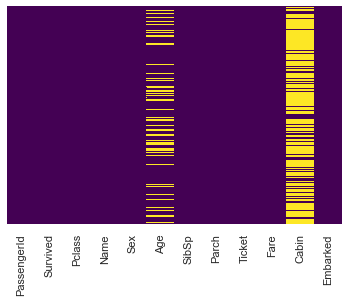

In [25]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### We can conclude here that the Age and Cabin columns have null values, which need to be taken care before feeding the data to the model

<AxesSubplot:xlabel='Survived', ylabel='count'>

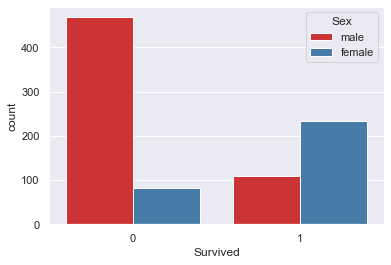

In [26]:
sns.countplot(x='Survived',data=df,palette="Set1",hue='Sex')

#### From above figure, it is clear that the most of the survived(1) people are Females and majority of the people who not survived (0) are males

<AxesSubplot:xlabel='Survived', ylabel='count'>

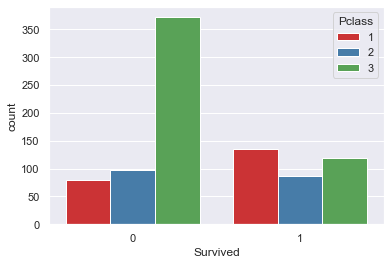

In [27]:
sns.countplot(x='Survived',data=df,palette="Set1",hue='Pclass')

#### From the above figure, it is clear that the people who survived(1) are from 1st passanger class and the people who not survived are majorly from 3rd passanger class

C:\Users\Sydney\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

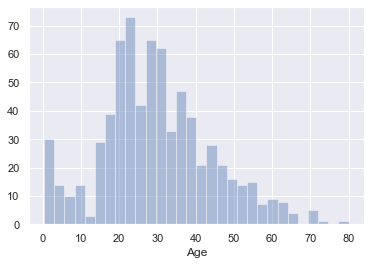

In [28]:
sns.distplot(df['Age'].dropna(), kde=False, bins=30)

#### It is clear from above figure that there are alot of childrens from age 0 to 10 in the ship and apart from this the average age is around 25-30

<AxesSubplot:xlabel='SibSp', ylabel='count'>

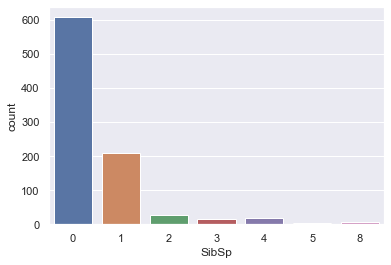

In [29]:
sns.countplot(x='SibSp',data=df)

#### As seen in above figure most of the people onboard are alone (i.e 0 no. of sibling/spouse) and other people are thosse who have 1 sibling/spouse most probably they must be the couples.


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

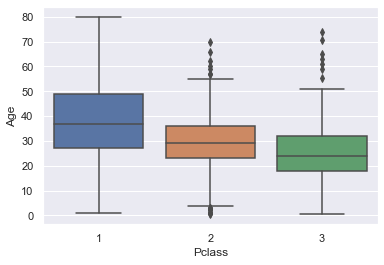

In [31]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [32]:
avg_age_first_class = np.round(df[(df['Pclass'] ==1)]['Age'].mean())
avg_age_first_class

38.0

In [33]:
avg_age_second_class = np.round(df[(df['Pclass'] ==2)]['Age'].mean())
avg_age_second_class

30.0

In [34]:
avg_age_third_class = np.round(df[(df['Pclass'] ==3)]['Age'].mean())
avg_age_third_class

25.0

#### Since we have many empty values in Age column, so we will replace all the null value in Age with avg. value of age according to Pclass.

#### Also from above boxplot we can see that the people who are in 1st class have avg. age of around 38, 2nd class passengers have avg. age of around 29 and 3rd class passengers have avg. age of around 25. This is because to afford 1st class tickets people should accumulate enough wealth so avg. age is higher

In [35]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return avg_age_first_class
        elif Pclass ==2:
            return avg_age_second_class
        else:
            return avg_age_third_class
    else:
        return Age

In [36]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

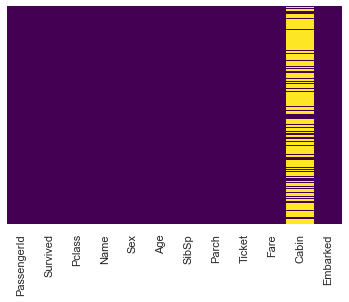

In [38]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### we have transformed null values in Age column as per out impute_age function. Now the null values in cabin column is large in number so it is better to drop the cabin column.

In [39]:
df.drop('Cabin',axis=1,inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<AxesSubplot:>

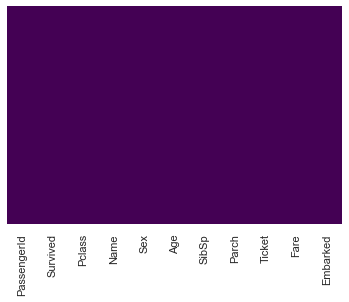

In [41]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
sex = pd.get_dummies(df['Sex'],drop_first=True)

In [43]:
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [44]:
df = pd.concat([df,sex,embark], axis=1)

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [46]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [47]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [48]:
df.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,25.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [49]:
df.drop(['PassengerId'],axis=1,inplace=True)

In [50]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [52]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [55]:
logmodel = LogisticRegression()

In [56]:
logmodel.fit(X_train,y_train)

C:\Users\Sydney\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
predictions = logmodel.predict(X_test)

In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

